In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv(r"bank-full.csv", sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.drop(["contact"],inplace=True,axis = 1)

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,unknown,no


In [6]:
data.drop(["day"],inplace=True,axis = 1)

In [7]:
data.drop(["month"],inplace=True,axis = 1)

In [8]:
data.drop(["poutcome"],inplace=True,axis = 1)

In [9]:
data.drop(["default"],inplace=True,axis = 1)

In [10]:
data

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,977,3,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,456,2,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,508,4,-1,0,no


In [11]:
data=pd.get_dummies(data,columns=['job'])

In [12]:
data

,age,marital,education,balance,housing,loan,duration,campaign,pdays,previous,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,2143,yes,no,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,29,yes,no,151,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,2,yes,yes,76,1,-1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,1506,yes,no,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,1,no,no,198,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,825,no,no,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,divorced,primary,1729,no,no,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
45208,72,married,secondary,5715,no,no,1127,5,184,3,...,0,0,0,1,0,0,0,0,0,0
45209,57,married,secondary,668,no,no,508,4,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data=pd.get_dummies(data,columns=['marital'])

In [14]:
data=pd.get_dummies(data,columns=['education'])

In [15]:
data=pd.get_dummies(data,columns=['housing'])

In [16]:
data=pd.get_dummies(data,columns=['loan'])

In [17]:
data=pd.get_dummies(data,columns=['y'])

In [18]:
data

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,58,2143,261,1,-1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
1,44,29,151,1,-1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
2,33,2,76,1,-1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
3,47,1506,92,1,-1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
45207,71,1729,456,2,-1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
45208,72,5715,1127,5,184,3,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
45209,57,668,508,4,-1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [19]:
X = data.iloc[:,0:29]
Y = data.iloc[:,30]

In [20]:
classifier = LogisticRegression()
classifier.fit(X,Y)

/Users/smit/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = classifier.predict(X)

In [22]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [23]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,0
45209,0,0


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39155   767]
 [ 4241  1048]]


In [27]:
((39155+1048)/(39155+767+4241+1048))*100

88.92304970029417

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.20      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

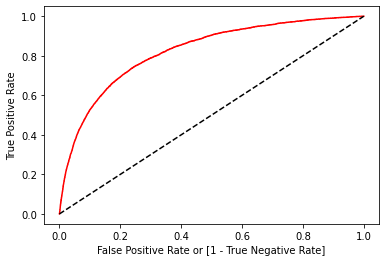

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [30]:
auc

0.5894673167223259